# Code for Deep Learning for Fashion: Performance Evaluation of Random Forests and CNNs for Fashion Image Classification

Modern deep learning designates a portion of AI connected with neural networks containing a large number of layers for modeling complex patterns in big datasets. These are typically referred to as deep neural networks and have been very successful recently in tasks related to image recognition, natural language processing, speech recognition, and autonomous driving. By leveraging large volumes of labeled data and immense computational power, deep learning models can extract complex patterns from data without explicit programming. Applications range from healthcare, including disease diagnosis; finance, including fraud detection; and entertainment, including recommendation systems, all the way to customer service through chatbots and virtual assistants. Further evolution of deep learning is driving breakthroughs in AI, thereby allowing smarter and more effective systems to come into being.

We have chosen the fashion-mnist dataset out of the datasets given to us and we have performed various methods of classification with different hyperpaprameters and compared the results against each other so that we can obtain accurate results of classification

In [1]:
# Importing various required packages
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
import itertools
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau

## Part 1: Data Preperation

### Data Splitting

The fashion_mnist dataset is loaded from the keras datasets and the dataset is already divided to training and testing data. When we call upon the .load_data function for fashion_mnist, we get 60,000 training images of 28x28 pixels, along with the labels as well as 10,000 testing images of 28x28 pixels with their respective testing labels. Since it is already distributed, while we load the data we save the data in 4 variables: train_images, train_labels, test_images and test_labels for data splitting.

In [2]:
# Loading Fashion-MNIST dataset for analysis
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Data Cleansing and Transfromation

We have downloaded the fashion-mnist dataset to proceed with the analysis. The dataset is already a clean one, but we need to verify that all the elements in the dataset have no null values which might disrupt the classification process and training. So we run a code to make sure that our data is clean and ready to be used for future analysis steps.

In [3]:
# Given that the data is already clean, we check for the cleanliness of data before analysis
missing_values = {
    "Train Images": np.isnan(train_images).sum(),
    "Train Labels": np.isnan(train_labels).sum(),
    "Test Images": np.isnan(test_images).sum(),
    "Test Labels": np.isnan(test_labels).sum()
    }

for dataset, count in missing_values.items():
    print(f"The number of missing values in {dataset} is: {count}")
#From the output we can see there are no missing values

The number of missing values in Train Images is: 0
The number of missing values in Train Labels is: 0
The number of missing values in Test Images is: 0
The number of missing values in Test Labels is: 0


We see that there are no missing values, so we do not need any further cleaning. We proceed to transform the data so that we can process the images appropriately. We try and scale the data from [0,1] by dividing the pixel values 255 since each pixel value ranges from [0,255]. Then we flatten the images to a single dimentional vector from a 2D vector. So from 28x28 pixel images we get a 784 dimensional vector.

In [4]:
# Normalization
# We can do divide by 255 normalization: As it is image data the pixel values of the images are in the range [0, 255]. Dividing by 255 scales them to the range [0, 1].
# We can do MinMax Scaler too. But as it also normalizing data to [0,1] the output might be similar to divide by 255.
# The Standard Scaler or Z-normalization is suitable for numeric data, it is not advisable to use them here.

# We normalize the image data by scaling pixel values to the range [0, 1]
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

# We flatten the images from 28x28 matrices to 784-dimensional vectors
# The transformation is useful for visualizing and analyzing image data in a 1D format.
x_train_flat = train_images_scaled.reshape(train_images_scaled.shape[0], -1)
x_test_flat = test_images_scaled.reshape(test_images_scaled.shape[0], -1)


In [5]:
# Using a second normalization technique and checking for similar outputs
scaler = MinMaxScaler()

# We reshape the data and normalize it using Min-Max Scaler.
train_images_reshaped = train_images.reshape(train_images.shape[0], -1)
train_images_normalized = scaler.fit_transform(train_images_reshaped)

We then proceed to create a dataframe for easy visualization of our analysis.

In [6]:
# Creating a Dataframe
df_train = pd.DataFrame(x_train_flat)
label_df_train = pd.DataFrame(train_labels)

## Part 2: Exploratory Data Analysis

### Descriptive Statistics

We will now check how our dataset is structured so that we can have an accurate grasp on what kind of images we are dealing with and what type of models we should use to accurately classify our data. We check for the data shape, to see that if we really have 60,000 images in our training set. And what are the class labels assosiated with the images.

In [7]:
# We verify dataset shape
print("Train dataset images shape:", train_images.shape)
print("Train dataset labels shape:", train_labels.shape)
# We print the labels assigned
print("Labels set: ", set(train_labels))

Train dataset images shape: (60000, 28, 28)
Train dataset labels shape: (60000,)
Labels set:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


We move forward and check what kind of class distribution is present in the dataset: as in which class has how many data elements in the image training dataset. We find the number for each class, as well as plot the graph for the distribution.

The class distribution for the training dataset is: 
For class T-shirt/top (0) we have 6000 samples
For class Trouser (1) we have 6000 samples
For class Pullover (2) we have 6000 samples
For class Dress (3) we have 6000 samples
For class Coat (4) we have 6000 samples
For class Sandal (5) we have 6000 samples
For class Shirt (6) we have 6000 samples
For class Sneaker (7) we have 6000 samples
For class Bag (8) we have 6000 samples
For class Ankle boot (9) we have 6000 samples
****The dataset is perfectly balanced.****


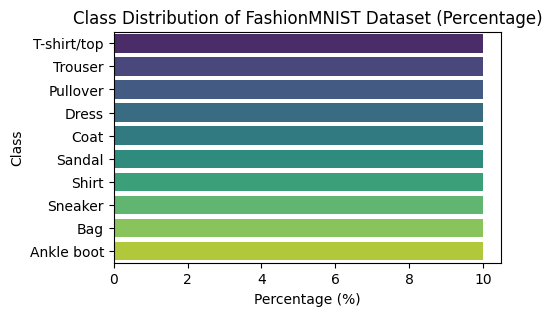

In [8]:
# We check the class distribution of the training data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_counts = np.bincount(train_labels)
total_samples = sum(class_counts)
num_classes = len(class_counts)
print("The class distribution for the training dataset is: ")
for label, count in enumerate(class_counts):
    print(f"For class {class_names[label]} ({label}) we have {count} samples")

# We check if we have a balanced dataset
is_balanced = all(count == class_counts[0] for count in class_counts)
if is_balanced:
  print("****The dataset is perfectly balanced.****")
else:
  print("****The dataset is not perfectly balanced.****")

# We calculate the percentage for each class
percentages = [count / total_samples * 100 for count in class_counts]

plt.figure(figsize = (5, 3))
sns.barplot(x = percentages, y = class_names, palette = "viridis", hue = class_names, legend = False)
plt.title("Class Distribution of FashionMNIST Dataset (Percentage)")
plt.xlabel("Percentage (%)")
plt.ylabel("Class")
plt.show()


We see that each of the class occupies 10% or 6000 images in the training dataset which has a total of 60,000. Thus we can conclude that it is a perfectly distributed dataset. Now we will move on to the statistics data for the training dataset, calculating the common statistical features for the same.

We start with pixel distribution in the images. For this we use a histogram plot to plot the frequency of the pixels with the pixel values as the x-axis and the frequency in the y-axis. It gives us an idea along with the summary stats about what range of pixels are present in the images as a whole.

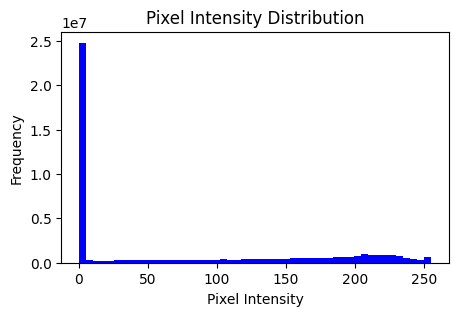

In [9]:
# Pixel Intensity Distribution
plt.figure(figsize = (5, 3))
plt.hist(train_images.flatten(), bins = 50, color = 'blue')
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

We see that the highest frequency is that of 0.0, which is a black pixel. It is a natural result as the images are in greyscale and the black spaces in a greyscale image are all represented by a black pixel. We further confirm it with calculated statistics.

In [10]:
# We calculate the Mean, Median and Standard Deviation for the training dataset for the original and other normalized values

# Using original data
original_mean = np.mean(train_images)
original_median = np.median(train_images)
original_std_dev = np.std(train_images)

# Using normalized data (by dividing by 255)
normalized_mean_div_255 = np.mean(x_train_flat)
normalized_median_div_255 = np.median(x_train_flat)
normalized_std_div_255 = np.std(x_train_flat)

# Using normalized data (Min-Max scaler)
normalized_mean_minmax = np.mean(train_images_normalized)
normalized_median_minmax = np.median(train_images_normalized)
normalized_std_minmax = np.std(train_images_normalized)

# We print the calculated statistics values
print("\n--- Statistics for Original Data ---")
print(f"Mean of pixel values: {original_mean:.2f}")
print(f"Median of pixel values: {original_median:.2f}")
print(f"Standard deviation of pixel values: {original_std_dev:.2f}")

print("\n--- Statistics for Normalized Data (Divided by 255) ---")
print(f"Mean of pixel values: {normalized_mean_div_255:.2f}")
print(f"Median of pixel values: {normalized_median_div_255:.2f}")
print(f"Standard deviation of pixel values: {normalized_std_div_255:.2f}")

print("\n--- Statistics for Normalized Data (Min-Max Scaler) ---")
print(f"Mean of pixel values: {normalized_mean_minmax:.2f}")
print(f"Median of pixel values: {normalized_median_minmax:.2f}")
print(f"Standard deviation of pixel values: {normalized_std_minmax:.2f}")



--- Statistics for Original Data ---
Mean of pixel values: 72.94
Median of pixel values: 0.00
Standard deviation of pixel values: 90.02

--- Statistics for Normalized Data (Divided by 255) ---
Mean of pixel values: 0.29
Median of pixel values: 0.00
Standard deviation of pixel values: 0.35

--- Statistics for Normalized Data (Min-Max Scaler) ---
Mean of pixel values: 0.29
Median of pixel values: 0.00
Standard deviation of pixel values: 0.35


We see the pixel value distribution for the datset overall. We find that most of the pixels are 0.0 since the median for all three are 0.0. We also see that initially we have the mean as 72.94 for unprocessed data, but after normalization, the mean of the pixel values comes in the range of [0,1] which we intended to do. It is the same for standard deviation. We have successfully normalized our pixel data. We also observe that we get the same statistical values for both dividing by 255 as well as using Min-Max Scaler, proving both give us the same normalized pixel outputs.

Now we move on to taking the mean, median and standard deviation of each image in our training dataset and plotting bar graphs for their respective statistical values.

In [11]:
# We calculate the Mean, Median and Standard Deviation for the training dataset dataframe

df_tranformed = pd.DataFrame(columns = ['Mean', 'Median', 'Standard Deviation'])
# Using transformed data - pandas dataframe
df_tranformed['Mean'] = df_train.mean(axis = 1)
df_tranformed['Median'] = df_train.median(axis = 1)
df_tranformed['Standard Deviation'] = df_train.std(axis = 1)
df_tranformed

,Mean,Median,Standard Deviation
0,0.381388,0.172549,0.399440
1,0.423159,0.431373,0.395670
2,0.143367,0.000000,0.195021
3,0.233338,0.054902,0.254473
4,0.306057,0.000000,0.407488
...,...,...,...
59995,0.104857,0.000000,0.216823
59996,0.213891,0.000000,0.365092
59997,0.312855,0.000000,0.421880
59998,0.167617,0.223529,0.151111


In [12]:
# We find the median mean, median and standard deviation for the images in the training dataset
statistics_transformed = df_tranformed.median()
print('The tranformed images median mean, median and std are: ')
print(statistics_transformed)

The tranformed images median mean, median and std are: 
Mean                  0.271871
Median                0.007843
Standard Deviation    0.331959
dtype: float64


We see that the median of mean of the images are 0.272, the median of median we find equals to 0.008 and the median ofstandard deviation comes to 0.332. We further create box plots to visually see the analysis of the samples.

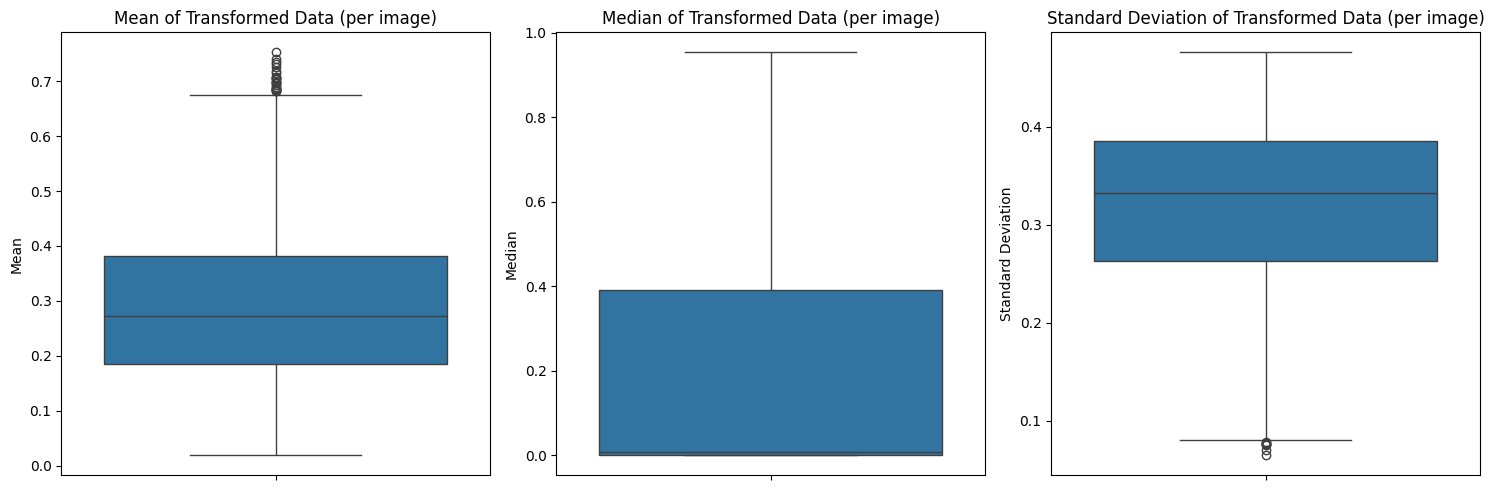

In [13]:
# We plot the mean, median and std of each image on box plot
plt.figure(figsize = (15, 5))

# Plotting mean
plt.subplot(1, 3, 1)
sns.boxplot(data = df_tranformed['Mean'])
plt.title('Mean of Transformed Data (per image)')

# Plotting median
plt.subplot(1, 3, 2)
sns.boxplot(data = df_tranformed['Median'])
plt.title('Median of Transformed Data (per image)')

# Plotting standard deviation
plt.subplot(1, 3, 3)
sns.boxplot(data = df_tranformed['Standard Deviation'])
plt.title('Standard Deviation of Transformed Data (per image)')
plt.tight_layout()
plt.show()

These summary statistics give us the idea about the images we are dealing with, that is most of the normalized pixel values lie between 0.0 to 0.4, and that the deviation is between 0.25 to 0.4 approximately. The values giev us an idea about how the data is spread, and in what particular values.

### Data Visualization

For this section, we first print the sample images that are present in each class of the dataset of fashion_mnist. This gives us an idea how the images looked before our preprocessing.

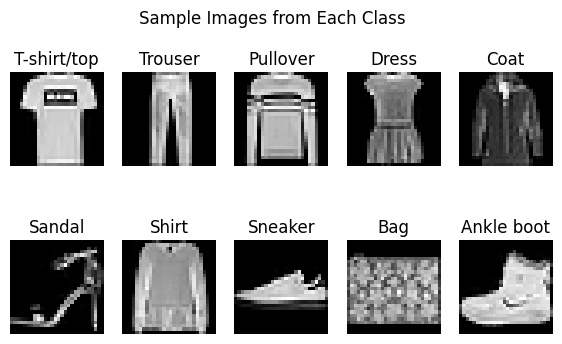

In [14]:
# We display Sample Images from Each Class
plt.figure(figsize = (7, 4))
for i in range(num_classes):
  plt.subplot(2, 5, i + 1)
  sample_image = train_images[train_labels == i][0]
  plt.imshow(sample_image, cmap="gray")
  plt.title(class_names[i])
  plt.axis("off")
plt.suptitle("Sample Images from Each Class")
plt.show()

We now move on to claculate the correlation matrix for the images present in the dataset. We also calculate the eigenvalues and the eigenvectors for the same.

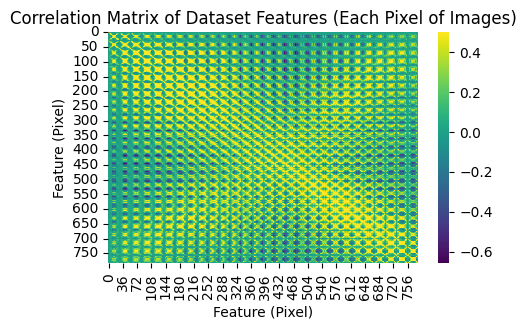

In [15]:
# We flatten the images for further calculations
flattened_images = train_images.reshape(train_images.shape[0], -1)

# We calculate the correlation matrix
correlation_matrix = np.corrcoef(flattened_images, rowvar = False)

# We plot the correlation matrix
plt.figure(figsize = (5, 3))
sns.heatmap(correlation_matrix, cmap = 'viridis', vmax = 0.5)
plt.title("Correlation Matrix of Dataset Features (Each Pixel of Images)")
plt.xlabel("Feature (Pixel)")
plt.ylabel("Feature (Pixel)")
plt.show()

This map helps us visulaze the correlation of each feature, in this case the pixel values of each image and how they correlate to the features of other images in the training dataset. Let us further calculate the eigenvalues and eigenvectors for the same.

In [16]:
# We claculate the covariance metrics for eigenvalues and eigenvectors
mnist_fashion_cov = np.cov(df_train, rowvar = False)
eval, evect = np.linalg.eig(mnist_fashion_cov)

print("The covariance matrix is :\n ", mnist_fashion_cov)
print("The eigenvalues are: \n", eval)
print("The eigenvectors are :\n ", evect)

The covariance matrix is :
  [[1.31736554e-07 1.14758391e-07 1.14459424e-07 ... 7.92262339e-08
  8.52732398e-08 9.62716545e-08]
 [1.14758391e-07 9.53749891e-07 1.65491957e-06 ... 2.39370959e-06
  1.03290380e-06 1.63889309e-07]
 [1.14459424e-07 1.65491957e-06 9.06761225e-06 ... 1.06742951e-05
  3.01881361e-06 5.96717771e-07]
 ...
 [7.92262339e-08 2.39370959e-06 1.06742951e-05 ... 4.58073189e-03
  1.57065665e-03 1.32960813e-04]
 [8.52732398e-08 1.03290380e-06 3.01881361e-06 ... 1.57065665e-03
  1.28283423e-03 1.46193336e-04]
 [9.62716545e-08 1.63889309e-07 5.96717771e-07 ... 1.32960813e-04
  1.46193336e-04 6.62678053e-05]]
The eigenvalues are: 
 [1.98098057e+01 1.21122105e+01 4.10615661e+00 3.38182839e+00
 2.62477022e+00 2.36084678e+00 1.59744034e+00 1.29982360e+00
 9.20828072e-01 8.96558812e-01 6.77313601e-01 6.22998726e-01
 5.22403760e-01 4.50033978e-01 4.14659933e-01 4.02360864e-01
 3.76515209e-01 3.57800138e-01 3.12489521e-01 3.10740295e-01
 2.95847641e-01 2.77711294e-01 2.62471897e-

In [17]:
# Shapes of the calculations done
print("The shape of the covariance matrix is : ", mnist_fashion_cov.shape)
print("The shape of the eigenvalues matrix is: ", eval.shape)
print("The shape of the eigenvectors matrix is: ", evect.shape)

The shape of the covariance matrix is :  (784, 784)
The shape of the eigenvalues matrix is:  (784,)
The shape of the eigenvectors matrix is:  (784, 784)


We see that the shape of the covariance matrix is (784,784) which corresponds to the flattened image features (28x28) which gives us 784 pixels per image. We also observe that we have (784,) eigenvalues as each eigenvalue corresponds to how much variance is explained by each eigenvector and the shape of the eigenvectors is (784,784) as each column is an eigenvector corresponding to a principal component. Each eigenvector has 728 components, one for each feature. We visualize other aspects of the covariance atrix and eigenvalues and eigenvectors in the following codes.

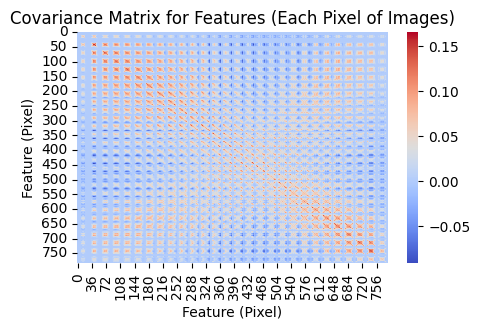

In [18]:
# We display the covariance matrix obtained during calculations
plt.figure(figsize = (5, 3))
sns.heatmap(mnist_fashion_cov, cmap="coolwarm", annot = False, fmt = ".2f")
plt.title("Covariance Matrix for Features (Each Pixel of Images)")
plt.xlabel("Feature (Pixel)")
plt.ylabel("Feature (Pixel)")
plt.show()

The following plot specifically focuses on the variances of the features in the dataset, since the diagonal elements of the covariance matrix represent the variances of each feature. The visualization includes a histogram, a Kernel Density Estimate (KDE) plot, and a rug plot to emphasize the distribution and the statistical properties of the variances.

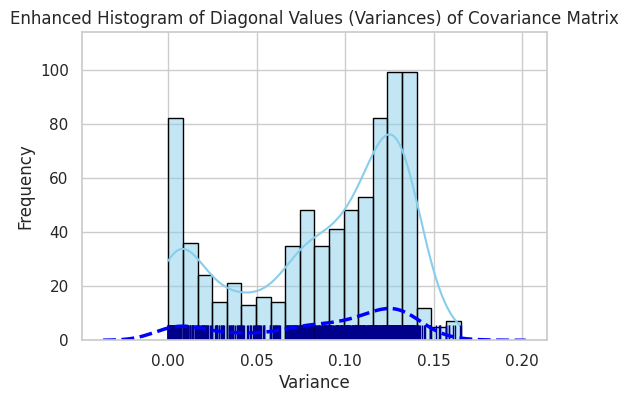

In [19]:
# We plot variance from the covariance matrix in a histogram form
sns.set(style="whitegrid")
diag_values = np.diag(mnist_fashion_cov)
plt.figure(figsize = (6, 4))
sns.histplot(diag_values, kde=True, bins=20, color="skyblue", edgecolor="black")
sns.rugplot(diag_values, color="darkblue", height=0.05)  # Adds rug plot markers
sns.kdeplot(diag_values, color="blue", linewidth=2.5, linestyle="--")

plt.title("Enhanced Histogram of Diagonal Values (Variances) of Covariance Matrix")
plt.xlabel("Variance")
plt.ylabel("Frequency")
plt.show()


We move on to plot the eigenvalues obtained so that we can visualize our data better for dimensionality reduction purposes. We do a scree plot and a cumulative explained variance, with the number of principal components from 0 to 783. We do this to visualize the elbow point for the principal component analysis as the number of principal components to retain is often chosen based on the elbow in the scree plot, as it indicates a natural cutoff where adding more components doesn't significantly increase the explained variance. Similar to a scree plot, the elbow on the cumulative explained variance plot indicates the point at which adding more principal components starts contributing very little to the total variance.

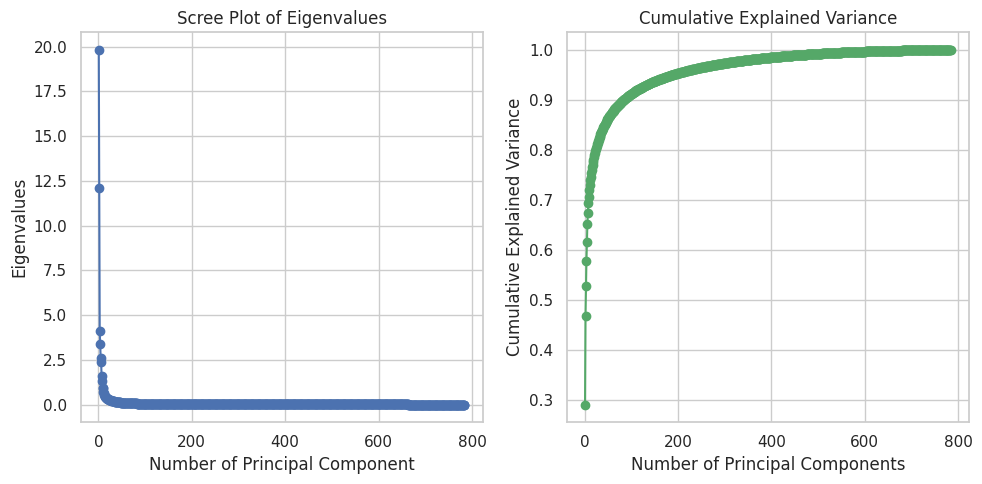

In [20]:
# We sort the eigenvalues in descending order for better visualization
sorted_eigenvalues = np.sort(eval)[::-1]

fig, axs = plt.subplots(1, 2, figsize = (10, 5))

# We do a scree plot
axs[0].plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker = 'o', linestyle = '-', color = 'b')
axs[0].set_title("Scree Plot of Eigenvalues")
axs[0].set_xlabel("Number of Principal Component")
axs[0].set_ylabel("Eigenvalues")

# We do a cumulative explained variance plot
cumulative_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
axs[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker = 'o', linestyle = '-', color = 'g')
axs[1].set_title("Cumulative Explained Variance")
axs[1].set_xlabel("Number of Principal Components")
axs[1].set_ylabel("Cumulative Explained Variance")
axs[1].grid(True)

plt.tight_layout()
plt.show()

We visualize the top 10 principal components (PCs), the first 10 eigenvectors, which are the principal components that explain the most variance in the dataset as images.

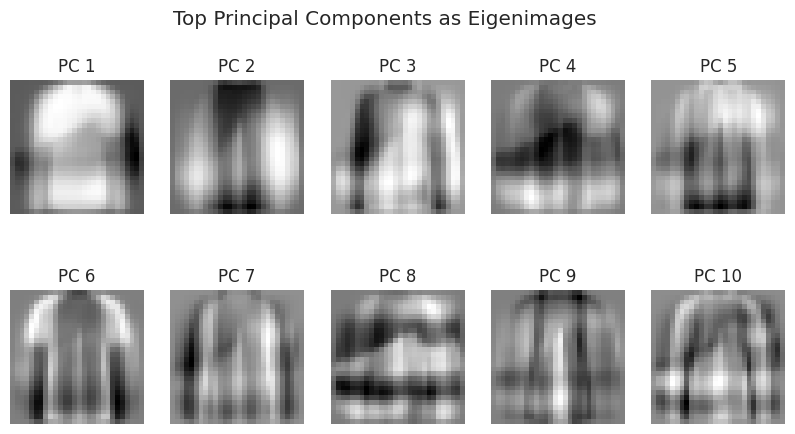

In [21]:
# We reshape and visualize the top eigenvectors as images
num_top_components = 10

plt.figure(figsize = (10, 5))
for i in range(num_top_components):
  plt.subplot(2, 5, i + 1)
  plt.imshow(evect[:, i].reshape(28, 28), cmap = 'gray')
  plt.title(f"PC {i+1}")
  plt.axis("off")
plt.suptitle("Top Principal Components as Eigenimages")
plt.show()

We also do a PCA analysis using number of components as 2 and 3 and plotting the analysis in a graph so that we can get a visual representation of the dimensionality reduction operations.

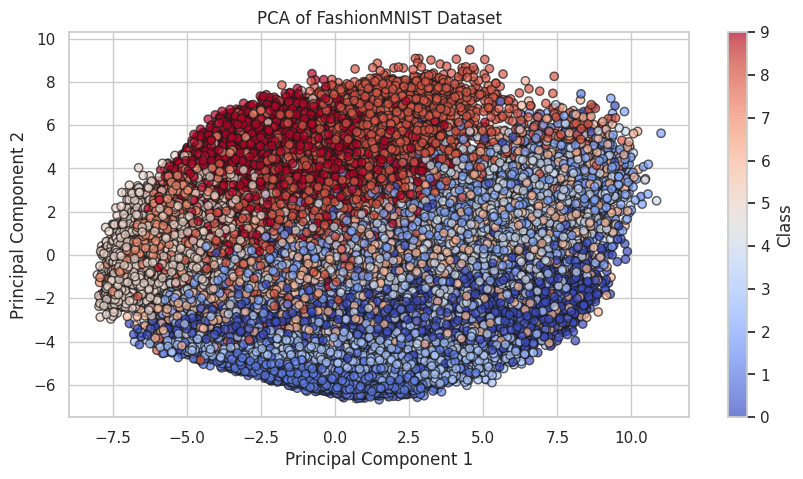

In [22]:
# PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_train)

# Scatter plot of the PCA result
plt.figure(figsize = (10, 5))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c = label_df_train[0], cmap = "coolwarm", edgecolor = 'k', alpha = 0.7)
plt.colorbar(scatter, ticks = range(num_classes), label = "Class")
plt.title("PCA of FashionMNIST Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


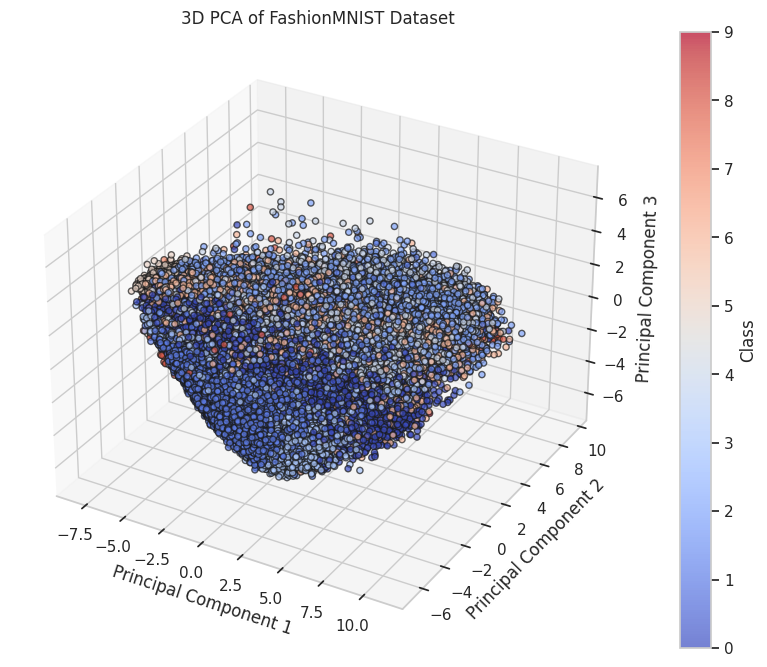

In [23]:
# PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_train)

# 3D Scatter plot of the PCA result
fig = plt.figure(figsize = (14, 8))
ax = fig.add_subplot(111, projection = '3d')

# We plot the data points with colors based on labels
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c = label_df_train[0], cmap = "coolwarm", edgecolor = 'k', alpha = 0.7)
ax.set_title("3D PCA of FashionMNIST Dataset")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
cbar = plt.colorbar(scatter, ax = ax, ticks = range(num_classes), label = "Class")
plt.show()


We also greate a t-SNE plot for a sample of the training dataset, since creating a t-SNE for the entire dataset would require much computation and will be time consuming. We take 3000 random images and we try creating a plot from it.

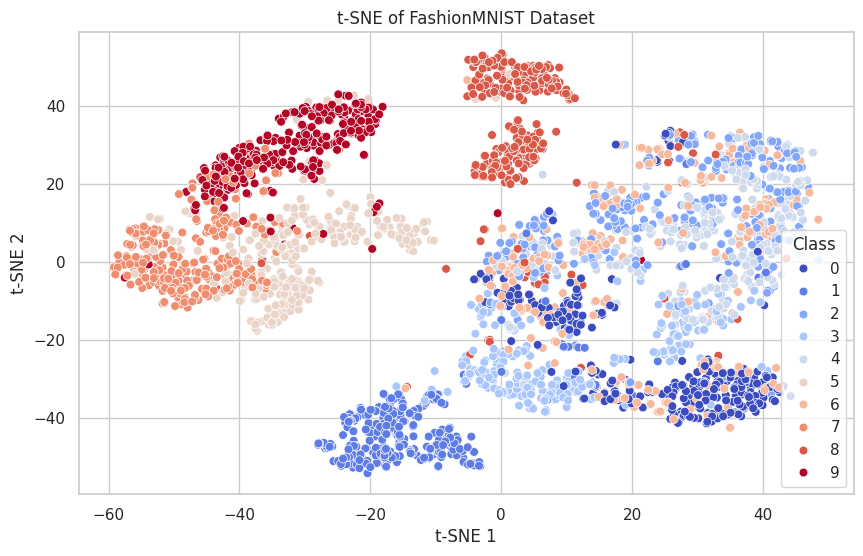

In [24]:
# We sample a subset
sample_indices = np.random.choice(len(flattened_images), size=3000, replace=False)
sample_images = flattened_images[sample_indices]
sample_labels = train_labels[sample_indices]

# Normalize the images
sample_images_scaled = sample_images / 255.0

# We apply t-SNE
tsne = TSNE(n_components = 2, perplexity = 30, random_state = 42)
tsne_result = tsne.fit_transform(sample_images_scaled)

tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Label'] = sample_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x = 't-SNE 1', y = 't-SNE 2', hue = 'Label', palette = "coolwarm", data = tsne_df, legend = "full", s = 40)
plt.title("t-SNE of FashionMNIST Dataset")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title = "Class")
plt.show()


## Part 3: Model Selection

Now that we have finished with the preprocessing and analysis of data, we move on to the classification routines. First we split the training data into train and validation datasets, along with the already split test data for the analysis.

In [25]:
# We ssplit the training data into training and validation sets with stratified sampling
x_train, x_val, y_train, y_val = train_test_split( df_train, train_labels, test_size = 0.2, random_state = 42, stratify = train_labels)

# We print the shapes of the training, validation, and test datasets
print(f"Training set shapes: {x_train.shape}, {y_train.shape}")
print(f"Validation set shapes: {x_val.shape}, {y_val.shape}")
print(f"Test set shapes: {x_test_flat.shape}, {test_labels.shape}")

# We assign flattened data
x_train_flatten, x_val_flatten = x_train, x_val
test_images_flatten = x_test_flat

Training set shapes: (48000, 784), (48000,)
Validation set shapes: (12000, 784), (12000,)
Test set shapes: (10000, 784), (10000,)


For our first model we select **Random Forest Classifier**.

**Interpretebility**:

A Random Forest Classifier is an ensemble learning method that constructs a multitude of decision trees during training and then combines their outputs to make a final prediction. Each of the decision trees in the forest is trained on a random subset of the data, both in terms of the samples via bootstrapping and the features via random feature selection. In its predictions, the classifier considers an aggregation of the outputs of all individual trees, using majority voting for example in classification tasks. Since a single decision tree suffers from overfitting, this approach reduces overfitting and increases accuracy by taking advantage of the "wisdom of crowds."

**Justification for choosing the Classifier:**

Random forests are particularly suitable in multi-class classification since they send multiple categories by building trees that classify samples to various classes and using the majority vote for each class. Their robustness, capability to handle high-dimensional data, and tolerance to noise and missing values turn them into an excellent tool for complex multi-class classification problems, reliably yielding interpretable results.

We check the common attributes of a simple RandomForestClassifier.

In [26]:
# We initialize the classifier
rf_classifier = RandomForestClassifier()

# Attributes to print
attributes = {
    "Number of trees (n_estimators)": rf_classifier.n_estimators,
    "Criterion": rf_classifier.criterion,
    "Maximum depth (max_depth)": rf_classifier.max_depth,
    "Minimum samples split (min_samples_split)": rf_classifier.min_samples_split,
    "Minimum samples leaf (min_samples_leaf)": rf_classifier.min_samples_leaf,
    "Maximum features (max_features)": rf_classifier.max_features,
    "Bootstrap": rf_classifier.bootstrap,
    "Random state": rf_classifier.random_state,
    }

# We print each attribute in a loop
for attribute, value in attributes.items():
    print(f"{attribute}: {value}")

Number of trees (n_estimators): 100
Criterion: gini
Maximum depth (max_depth): None
Minimum samples split (min_samples_split): 2
Minimum samples leaf (min_samples_leaf): 1
Maximum features (max_features): sqrt
Bootstrap: True
Random state: None


We first use a random state of 42 and try to use the base model for generating a classification and try and classify our training data. We get our classification summary metrics, as well as a confusion matrix for the predicted data.

The results from the validation set evaluations are:
Accuracy: 0.8827
Precision: 0.8820
Recall: 0.8827
F1 Score: 0.8816


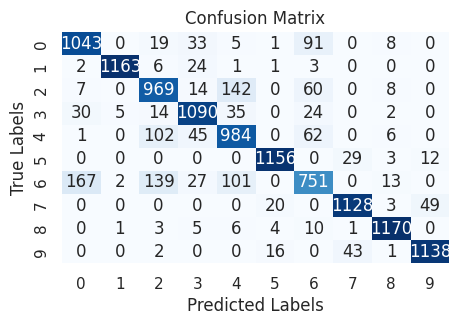

In [27]:
# We initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state = 42)
rf_classifier.fit(x_train_flatten, y_train)

# We predict on the validation set
y_val_pred = rf_classifier.predict(x_val_flatten)

# We calculate evaluation metrics
metrics = {
    "Accuracy": accuracy_score(y_val, y_val_pred),
    "Precision": precision_score(y_val, y_val_pred, average = 'weighted'),
    "Recall": recall_score(y_val, y_val_pred, average = 'weighted'),
    "F1 Score": f1_score(y_val, y_val_pred, average = 'weighted')
    }

# We display evaluation results
print("The results from the validation set evaluations are:")
for metric, value in metrics.items():
  print(f"{metric}: {value:.4f}")

# We display the assosiated confusion matrix
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_val, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Let us focus on the F1 scores. The default parameters gave us 88.16% F1 score. Now we try to change the max depth from default None to [10, 100, 200, 250, 300] for this default n_estimators = 100  and see if we observe any the difference. Let us focus mainly on metric: F1 score for now to see the patterns.

In [28]:
# Try with n_estimators: 100; max_depth = [10, 100, 200, 250,300]
rf_classifier = RandomForestClassifier(random_state = 42, max_depth = 10)
rf_classifier.fit(x_train_flatten, y_train)
y_val_pred = rf_classifier.predict(x_val_flatten)
f1_val_100_10 = f1_score(y_val, y_val_pred, average = 'weighted')
print("F1 score for n_estimators: 100 and max_depth: 10 = ", f1_val_100_10)
rf_classifier = RandomForestClassifier(random_state = 42, max_depth = 100)
rf_classifier.fit(x_train_flatten, y_train)
y_val_pred = rf_classifier.predict(x_val_flatten)
f1_val_100_100 = f1_score(y_val, y_val_pred, average = 'weighted')
print("F1 score for n_estimators: 100 and max_depth: 100 = ", f1_val_100_100)
rf_classifier = RandomForestClassifier(random_state = 42, max_depth = 200)
rf_classifier.fit(x_train_flatten, y_train)
y_val_pred = rf_classifier.predict(x_val_flatten)
f1_val_100_200 = f1_score(y_val, y_val_pred, average = 'weighted')
print("F1 score for n_estimators: 100 and max_depth: 200 = ", f1_val_100_200)
rf_classifier = RandomForestClassifier(random_state = 42, max_depth = 250)
rf_classifier.fit(x_train_flatten, y_train)
y_val_pred = rf_classifier.predict(x_val_flatten)
f1_val_100_250 = f1_score(y_val, y_val_pred, average = 'weighted')
print("F1 score for n_estimators: 100 and max_depth: 250 = ", f1_val_100_250)
rf_classifier = RandomForestClassifier(random_state = 42, max_depth = 300)
rf_classifier.fit(x_train_flatten, y_train)
y_val_pred = rf_classifier.predict(x_val_flatten)
f1_val_100_300 = f1_score(y_val, y_val_pred, average = 'weighted')
print("F1 score for n_estimators: 100 and max_depth: 300 = ", f1_val_100_300)

F1 score for n_estimators: 100 and max_depth: 10 =  0.852705606276191
F1 score for n_estimators: 100 and max_depth: 100 =  0.8816065243101396
F1 score for n_estimators: 100 and max_depth: 200 =  0.8816065243101396
F1 score for n_estimators: 100 and max_depth: 250 =  0.8816065243101396
F1 score for n_estimators: 100 and max_depth: 300 =  0.8816065243101396


We can see the max_depth of [250, 300] are not necessary as there is no significant difference. So we will stick to using [10, 100, 200] for the remaining n_estimators. We now try changing the n_estimators from 100 to 50, 200 and 500 and observe the various changes in the F1 score.

In [29]:
# Try with n_estimators: 50; max_depth = [10, 100, 200]
rf_classifier = RandomForestClassifier(n_estimators = 50, random_state = 42, max_depth = 10)
rf_classifier.fit(x_train_flatten, y_train)
y_val_pred = rf_classifier.predict(x_val_flatten)
f1_val_50_10 = f1_score(y_val, y_val_pred, average = 'weighted')
print("F1 score for n_estimators: 50 and max_depth: 10 = ", f1_val_50_10)
rf_classifier = RandomForestClassifier(n_estimators = 50, random_state = 42, max_depth = 100)
rf_classifier.fit(x_train_flatten, y_train)
y_val_pred = rf_classifier.predict(x_val_flatten)
f1_val_50_100 = f1_score(y_val, y_val_pred, average = 'weighted')
print("F1 score for n_estimators: 50 and max_depth: 100 = ", f1_val_50_100)
rf_classifier = RandomForestClassifier(n_estimators = 50, random_state = 42, max_depth = 200)
rf_classifier.fit(x_train_flatten, y_train)
y_val_pred = rf_classifier.predict(x_val_flatten)
f1_val_50_200 = f1_score(y_val, y_val_pred, average = 'weighted')
print("F1 score for n_estimators: 50 and max_depth: 200 = ", f1_val_50_200)

F1 score for n_estimators: 50 and max_depth: 10 =  0.8529824048789871
F1 score for n_estimators: 50 and max_depth: 100 =  0.8780087502864072
F1 score for n_estimators: 50 and max_depth: 200 =  0.8780087502864072


In [30]:
# Try with n_estimators: 200; max_depth = [10, 100, 200]
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state = 42, max_depth = 10)
rf_classifier.fit(x_train_flatten, y_train)
y_val_pred = rf_classifier.predict(x_val_flatten)
f1_val_200_10 = f1_score(y_val, y_val_pred, average = 'weighted')
print("F1 score for n_estimators: 200 and max_depth: 10 = ", f1_val_200_10)
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state = 42, max_depth = 100)
rf_classifier.fit(x_train_flatten, y_train)
y_val_pred = rf_classifier.predict(x_val_flatten)
f1_val_200_100 = f1_score(y_val, y_val_pred, average = 'weighted')
print("F1 score for n_estimators: 200 and max_depth: 100 = ", f1_val_200_100)
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state = 42, max_depth = 200)
rf_classifier.fit(x_train_flatten, y_train)
y_val_pred = rf_classifier.predict(x_val_flatten)
f1_val_200_200 = f1_score(y_val, y_val_pred, average = 'weighted')
print("F1 score for n_estimators: 200 and max_depth: 200 = ", f1_val_200_200)

F1 score for n_estimators: 200 and max_depth: 10 =  0.8556986815208583
F1 score for n_estimators: 200 and max_depth: 100 =  0.883878627489712
F1 score for n_estimators: 200 and max_depth: 200 =  0.883878627489712


In [31]:
# Try with n_estimators: 500; max_depth = [10, 100, 200]
rf_classifier = RandomForestClassifier(n_estimators = 500, random_state = 42, max_depth = 10)
rf_classifier.fit(x_train_flatten, y_train)
y_val_pred = rf_classifier.predict(x_val_flatten)
f1_val_500_10 = f1_score(y_val, y_val_pred, average = 'weighted')
print("F1 score for n_estimators: 500 and max_depth: 10 = ", f1_val_500_10)
rf_classifier = RandomForestClassifier(n_estimators = 500, random_state = 42, max_depth = 100)
rf_classifier.fit(x_train_flatten, y_train)
y_val_pred = rf_classifier.predict(x_val_flatten)
f1_val_500_100 = f1_score(y_val, y_val_pred, average = 'weighted')
print("F1 score for n_estimators: 500 and max_depth: 100 = ", f1_val_500_100)
rf_classifier = RandomForestClassifier(n_estimators = 500, random_state = 42, max_depth = 200)
rf_classifier.fit(x_train_flatten, y_train)
y_val_pred = rf_classifier.predict(x_val_flatten)
f1_val_500_200 = f1_score(y_val, y_val_pred, average = 'weighted')
print("F1 score for n_estimators: 500 and max_depth: 200 = ", f1_val_500_200)

F1 score for n_estimators: 500 and max_depth: 10 =  0.8562161898402959
F1 score for n_estimators: 500 and max_depth: 100 =  0.8843032828182095
F1 score for n_estimators: 500 and max_depth: 200 =  0.8843032828182095


Now that we have calculated different classification prediction scenarios using different hyperparameters in Random Forest, we plot a graph to see how each model compares and select the best model for using it on our testing data.

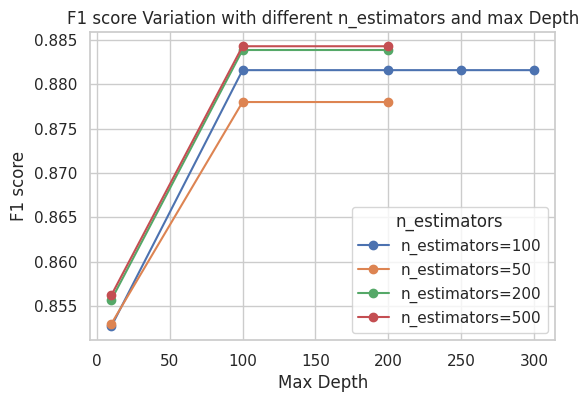

In [32]:
# We define the parameter combinations and their corresponding accuracies
n_estimators = [100, 50, 200, 500]
max_depth_values = [10, 100, 200, 250, 300]

f1_scores = {
    (100, 10): f1_val_100_10,
    (100, 100): f1_val_100_100,
    (100, 200): f1_val_100_200,
    (100, 250): f1_val_100_250,
    (100, 300): f1_val_100_300,
    (50, 10): f1_val_50_10,
    (50, 100): f1_val_50_100,
    (50, 200): f1_val_50_200,
    (200, 10): f1_val_200_10,
    (200, 100): f1_val_200_100,
    (200, 200): f1_val_200_200,
    (500, 10): f1_val_500_10,
    (500, 100): f1_val_500_100,
    (500, 200): f1_val_500_200
    }

# We plot accuracy for each n_estimators value across max_depth values
plt.figure(figsize = (6, 4))
for n in n_estimators:
    accuracies = [f1_scores.get((n, depth), None) for depth in max_depth_values]
    plt.plot(max_depth_values[:len(accuracies)], accuracies, label = f'n_estimators={n}', marker = 'o')
plt.xlabel('Max Depth')
plt.ylabel('F1 score')
plt.title('F1 score Variation with different n_estimators and max Depth')
plt.legend(title = 'n_estimators')
plt.grid(True)
plt.show()

We now select the best hyperparameters, which comes to n_estimators = 500 and max_depth = 100 and see how it performs on test data. We create a confusion matrix for the predicted results comparing it to the true labels, as well as display the classification summary metrics.

The evaluation results for the test dataset are: 
Accuracy: 0.8780
Precision: 0.8769
Recall: 0.8780
F1 Score: 0.8766
Confusion Matrix:


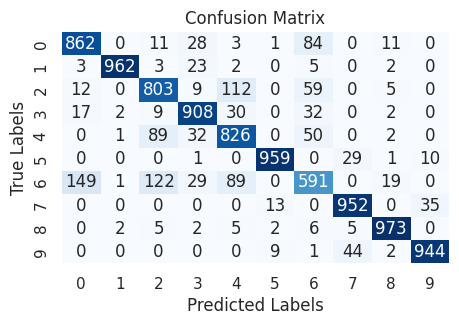

In [33]:
# We initialize and train the best obtained Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 500, random_state = 42, max_depth = 100)
rf_classifier.fit(x_train_flat, train_labels)

# We predict on the test dataset
test_pred = rf_classifier.predict(test_images_flatten)

# We calculate the evaluation metrics for the predicted test dataset results
accuracy_val = accuracy_score(test_labels, test_pred)
precision_val = precision_score(test_labels, test_pred, average = 'weighted')
recall_val = recall_score(test_labels, test_pred, average = 'weighted')
f1_val = f1_score(test_labels, test_pred, average = 'weighted')

# We create a confusion matrix for the same
conf_matrix_val = confusion_matrix(test_labels, test_pred)

# We print results for the test dataset
print('The evaluation results for the test dataset are: ')
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1 Score: {f1_val:.4f}")
print("Confusion Matrix:")

# We display the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_val, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Business Insights:**

Versatility, robustness, and high accuracy make the Random Forest Classifier very applicable in many practical applications for a wide range of industries that operate with complex data. It has helped in finance for credit scoring and fraud detection by classifying each transaction in real-time to find fraudulent activities. Random Forests are also used in e-commerce for product recommendations, based on customer behavior, and to classify users into different segments to optimize marketing strategies. Companies in the energy sector have started using Random Forests for predictive maintenance, classifying equipment failure risks to avoid costly downtimes. The strengths of this model include the capability to process big data with missing values, interpretability, and resistance to overfitting. In fact, it has proven to be a very powerful tool in data classification problems arising in various sectors. Modern companies apply this algorithm for customer segmentation, market analysis, and even the analysis of sentiment on social media-all applications showing its wide applicability in decision-making and optimization of business processes.

We initially selected the Random Forest technique for image classification, given that Fashion-MNIST is a moderate-sized dataset (60,000 training and 10,000 testing images). Random Forest seemed suitable for such datasets as it typically provides robust results without the risk of overfitting, which can sometimes occur when deep learning models like CNNs are applied to moderate datasets.

However, despite our efforts, the Random Forest model consistently fell short of achieving 90% accuracy, prompting us to explore CNNs as a potential alternative. We decided to experiment with CNNs to see if their deep learning architecture could extract more complex patterns and deliver better performance on this dataset.

Since RandomForestClassifier has failed to give us appropriate results, we now try to use **CNN** for achieving better results.

**Convolutional Neural Networks**

**Interpretebility:**

CNNs are mainly designed for image classification problems, and they work exceptionally well on multi-class image classification. CNNs rely on a sequence of convolutional layers that automatically learn from the raw image data hierarchical features, such as edges, textures, and shapes, which make them highly capable of dealing with the spatial relationships and complicated patterns of images. In multi-class classification problems, the CNN generally uses a softmax function that yields probabilities for every class in the final layer, and the class with the highest probability is selected as the predicted label.

**Justification:**

We opted CNN over Random Forest Classifier for image classification because they are able to capture intricate spatial dependencies and local patterns within images, something that Random Forests, which operate based on decision trees and are not inherently spatially aware, struggle with. While random forests do an excellent job on structured data or with multi-class classification problems, CNNs learn from the pixel-level features of images more effectively to generalize to a broader context and, therefore, perform better on object recognition. Moreover, CNNs are more scalable and can learn feature representations automatically from big datasets, while Random Forests may face serious difficulties connected with high dimensionality. This makes CNNs a better choice for image-based multi-class classification problems.

We first preprocess the data and change the dimentions of the data, so that it is in an image form (28x28) since the CNN layers adds filters to the image and tries to extract spatial features. Thus instead of normalizing and flattening the image as we did for Random Forest, we keep the image as it is and add a third dimension for the channels.

In [35]:
# Create a dataset splitting of train, validation and test for CNN and preprocess the data
X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 0, stratify = train_labels)
tf.random.set_seed(42)
X_train = np.expand_dims(X_train,-1)
X_validation = np.expand_dims(X_validation,-1)
print('The input training data shape is: ')
print(X_train.shape)

The input training data shape is: 
(48000, 28, 28, 1)


In [37]:
# Function to plot the training accuracy and loss vs validation accuracy and loss
def plot_metrics(history, metric, ylabel, title, color_bg = "whitesmoke", color_fig = "lightgray"):
    """Plots training and validation metrics from model history with an enhanced look."""
    plt.figure(figsize=(6, 4))
    plt.plot(history.history[metric], label = f'Train {metric.capitalize()}', linestyle = '-', linewidth = 2, color = "teal")
    plt.plot(history.history[f'val_{metric}'], label = f'Validation {metric.capitalize()}', linestyle = '--', linewidth = 2, color = "tomato")
    plt.xlabel('Epochs', fontsize = 13, fontweight = 'bold')
    plt.ylabel(ylabel, fontsize = 13, fontweight = 'bold')
    plt.title(title, fontsize = 18, fontweight = 'bold', pad = 15)
    plt.legend(loc = 'best', frameon = True, fancybox = True, shadow = True, fontsize = 12)
    plt.grid(visible = True, color = 'gray', linestyle = ':', linewidth = 0.5)
    plt.gca().set_facecolor(color_bg)
    plt.gcf().patch.set_facecolor(color_fig)
    plt.tight_layout()
    plt.show()

In [38]:
# Function to create confusion matrix for the models
def plot_confusion_matrix(true_labels, pred_labels, class_names = None, plot_size = (6, 6), label_size = 15):
    cm = confusion_matrix(true_labels, pred_labels)
    cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    num_classes = cm.shape[0]
    fig, ax = plt.subplots(figsize=plot_size)
    heatmap = ax.matshow(cm, cmap = 'Blues')
    fig.colorbar(heatmap)
    ax.grid(False)
    labels = class_names if class_names else np.arange(num_classes)
    ax.set(title="Confusion Matrix",
           xlabel="Predicted Labels",
           ylabel="True Labels",
           xticks=np.arange(num_classes),
           yticks=np.arange(num_classes),
           xticklabels=labels,
           yticklabels=labels)
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    threshold = (cm.max() + cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, f"{cm[i, j]} ({cm_normalized[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                fontsize=label_size)
    plt.show()

classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat', 'Sandal','Shirt','Sneaker','Bag','Ankle boot']

Now, we create a very simple model - 1 CNN layer with a pooling layer and the rest fully connected layers:. The softmax function is used as the last activation because it gives a probability; hence, it can be perfect for multi-class classification. We use the Adam optimizer, which is a variant of stochastic gradient descent that combines the benefits of both momentum and RMSProp (Root Mean Square Propagation) to improve training efficiency and performance. and the SparseCategoricalCrossentropy() because it's a loss function that is usually used for multi-class classification problems, where the target labels are integers. We run this for 50 epochs and see how our model performs.

In [39]:
# We create the model
cnn_model_v1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = X_train[0].shape),
  tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(25, activation = "relu"),
  tf.keras.layers.Dense(50, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "softmax")
])

# We compile the model
cnn_model_v1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# We fit the model to the training data and validate it to calculate loss and accuracy
training_history1 = cnn_model_v1.fit(X_train, y_train, epochs=50, validation_data = (X_validation, y_validation))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3993 - loss: 2.1687 - val_accuracy: 0.7532 - val_loss: 0.6323
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7752 - loss: 0.5660 - val_accuracy: 0.8123 - val_loss: 0.4953
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8254 - loss: 0.4471 - val_accuracy: 0.8432 - val_loss: 0.4386
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8665 - loss: 0.3570 - val_accuracy: 0.8708 - val_loss: 0.3706
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8921 - loss: 0.3000 - val_accuracy: 0.8800 - val_loss: 0.3533
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9053 - loss: 0.2689 - val_accuracy: 0.8790 - val_loss: 0.3735
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9087 - loss: 0.2552 - val_accuracy: 0.8755 - val_loss: 0.3780
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9145 - loss: 0.2393 -

We observe that we achieve a accuracy of 96.98% for the training data, and a accuracy of 87.12% for the validation data at the end of 50 epochs. We make a graph for the values obtained so that we can see what is the trend of the data training with respect to metrics loss and accuracy.

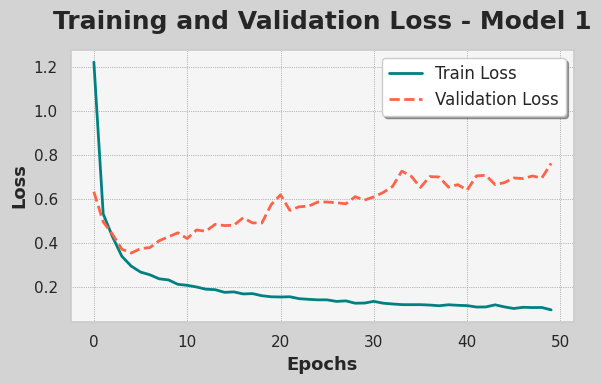

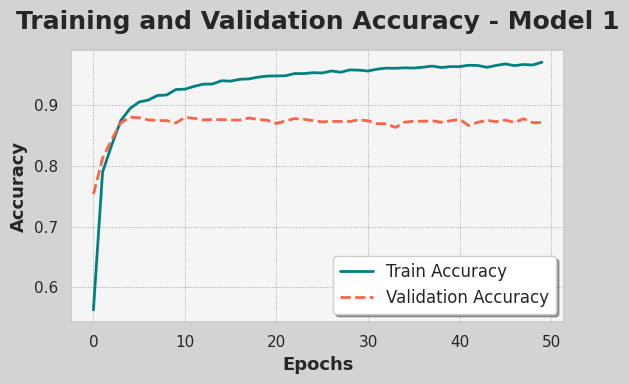

In [40]:
# We plot loss and Accuracy of Model-1
plot_metrics(training_history1, 'loss', 'Loss', 'Training and Validation Loss - Model 1')
plot_metrics(training_history1, 'accuracy', 'Accuracy', 'Training and Validation Accuracy - Model 1')

We make a summary of the model to get in details of which layer has what parameters for the model.

In [41]:
cnn_model_v1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │         313,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 948,227 (3.62 MB)

 Trainable params: 316,075 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 632,152 (2.41 MB)

We now check the various metrics such as accuracy, precision, recall and the F1 score. We also create a confusion matrix for the same for understanding how our prediction went visually.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
The evaluation results for the validation dataset are: 
Accuracy: 0.8712
Precision: 0.8746
Recall: 0.8712
F1 Score: 0.8721
Confusion Matrix:


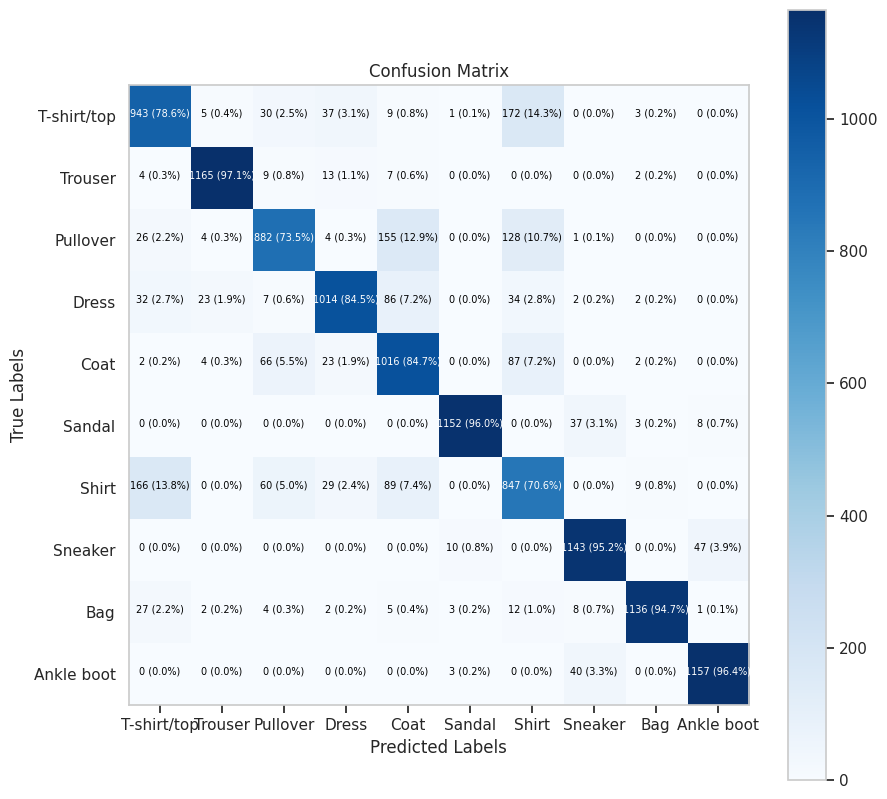

In [43]:
# Create a classification score report and confusion matrix for the same
y_probs = cnn_model_v1.predict(X_validation)
pred_labels = y_probs.argmax(axis = 1)
accuracy = accuracy_score(y_validation, pred_labels)
precision = precision_score(y_validation, pred_labels, average = 'weighted')
recall = recall_score(y_validation, pred_labels, average = 'weighted')
f1 = f1_score(y_validation, pred_labels, average = 'weighted')
print('The evaluation results for the validation dataset are: ')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
plot_confusion_matrix(true_labels = y_validation, pred_labels = pred_labels, class_names = classes, plot_size = (10, 10), label_size = 7)

When we plot the graph over epochs we see that even with overfitting, the model does not perform well with respect to validation accuracy. To overcome this we found 2 other models which we improve on and test for better results.

We create another CNN model, but this time, we add more convolutional layers and pooling layers, along with dropout layers so that we can extract more features and prefent overfitting of the model.

In [44]:
# We create the model
cnn_model_v2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=X_train[0].shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
   ])

# We compile the model
cnn_model_v2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
    )

# We fit the model to the training data and validate it to calculate loss and accuracy
training_history2 = cnn_model_v2.fit(X_train, y_train, epochs = 50, validation_data = (X_validation, y_validation))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7308 - loss: 0.9093 - val_accuracy: 0.8707 - val_loss: 0.3420
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8735 - loss: 0.3562 - val_accuracy: 0.8890 - val_loss: 0.3005
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8888 - loss: 0.3050 - val_accuracy: 0.8890 - val_loss: 0.3049
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8999 - loss: 0.2759 - val_accuracy: 0.9053 - val_loss: 0.2645
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9058 - loss: 0.2628 - val_accuracy: 0.9009 - val_loss: 0.2906
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.9120 - loss: 0.2494 - val_accuracy: 0.9068 - val_loss: 0.2584
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9117 - loss: 0.2393 - val_accuracy: 0.9039 - val_loss: 0.3000
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9170 - loss: 0.2271 - va

We observe that we achieve a accuracy of 77.54% for the training data, and a accuracy of 77.32% for the validation data. We make a graph for the values obtained so that we can see what is the trend of the data training with respect to metrics loss and accuracy.

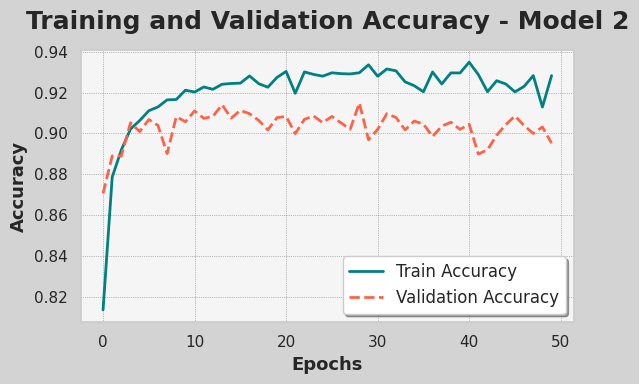

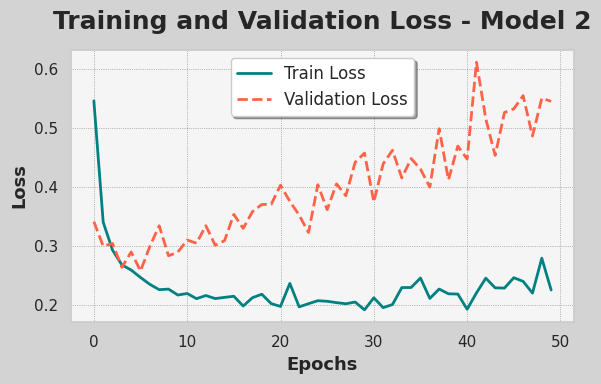

In [45]:
# Plot loss and Accuracy of Model-2
plot_metrics(training_history2, 'accuracy', 'Accuracy', 'Training and Validation Accuracy - Model 2')
plot_metrics(training_history2, 'loss', 'Loss', 'Training and Validation Loss - Model 2')

We make a summary of the model to get in details of which layer has what parameters for the model.

In [46]:
cnn_model_v2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,099,936 (19.45 MB)

 Trainable params: 1,699,978 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,399,958 (12.97 MB)

We now check the various metrics such as accuracy, precision, recall and the F1 score. We also create a confusion matrix for the same for understanding how our prediction went visually.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
The evaluation results for the validation dataset are: 
Accuracy: 0.8952
Precision: 0.8971
Recall: 0.8952
F1 Score: 0.8954
Confusion Matrix:


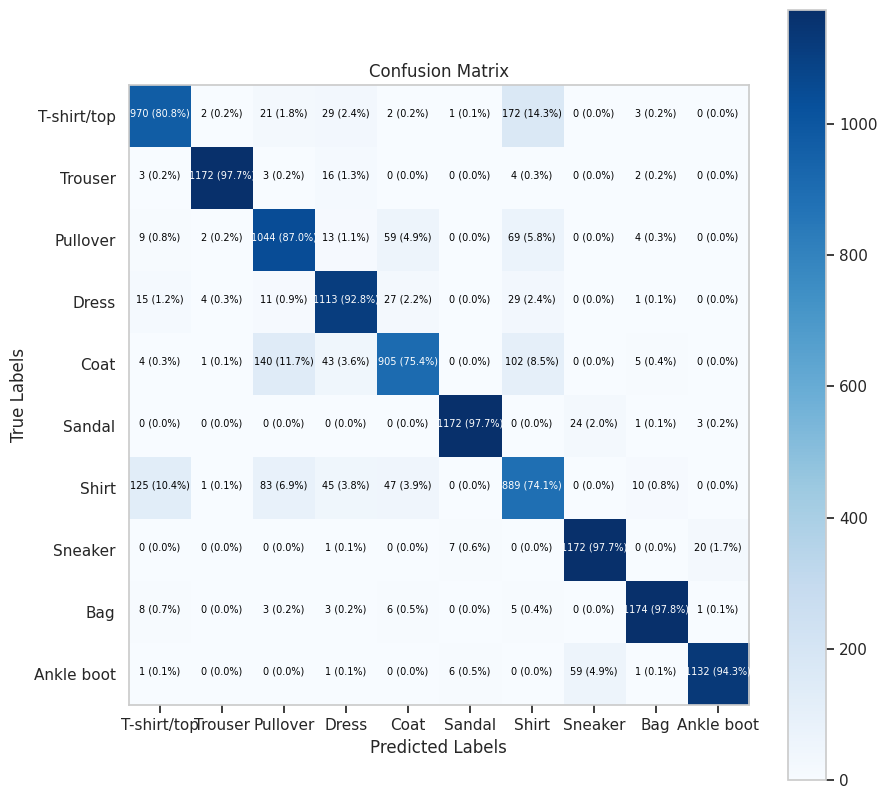

In [49]:
# Create a classification score report and confusion matrix for the same
y_probs2 = cnn_model_v2.predict(X_validation)
pred_labels2 = y_probs2.argmax(axis = 1)
accuracy = accuracy_score(y_validation, pred_labels2)
precision = precision_score(y_validation, pred_labels2, average = 'weighted')
recall = recall_score(y_validation, pred_labels2, average = 'weighted')
f1 = f1_score(y_validation, pred_labels2, average = 'weighted')
print('The evaluation results for the validation dataset are: ')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
plot_confusion_matrix(true_labels = y_validation, pred_labels = pred_labels2, class_names = classes, plot_size = (10, 10), label_size = 7)

This gives us a better result on our validation set, but we also see severe overfitting. We want to check if we can actually get better metrics by adding BatchNormalization to a complex CNN model with various blocks and giving a slower learning rate so that it can extract better 2D space features, while keeping overfitting at bay.

In [50]:
# We create the model
learning_rate_optimizer = RMSprop(learning_rate = 0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0)

lr_reduction_callback = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=1e-7
)

dropout_rate = 0.4

cnn_model_v3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),

    # Block 1
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(dropout_rate),

    # Block 2
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(dropout_rate),

    # Block 3
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(dropout_rate),

    # Block 4
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(dropout_rate),

    # Final Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(10, activation='softmax')
])

# We compile the model
cnn_model_v3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=learning_rate_optimizer,
    metrics=['accuracy']
)

# We fit the model to the training data and validate it to calculate loss and accuracy
training_history3 = cnn_model_v3.fit(X_train, y_train, epochs = 50, validation_data = (X_validation, y_validation), callbacks = [lr_reduction_callback])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.6829 - loss: 0.9758 - val_accuracy: 0.8733 - val_loss: 0.3578 - learning_rate: 0.0010
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8606 - loss: 0.4113 - val_accuracy: 0.8892 - val_loss: 0.3056 - learning_rate: 0.0010
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8823 - loss: 0.3486 - val_accuracy: 0.9004 - val_loss: 0.2744 - learning_rate: 0.0010
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8936 - loss: 0.3302 - val_accuracy: 0.9043 - val_loss: 0.2570 - learning_rate: 0.0010
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9034 - loss: 0.3044 - val_accuracy: 0.9104 - val_loss: 0.2447 - learning_rate: 0.0010
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9059 - loss: 0.2914 - val_accuracy: 0.9038 - val_loss: 0.2781 - learning_rate: 0.0010
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9

We observe that we achieve a accuracy of 95.78% for the training data, and a accuracy of 93.86% for the validation data. We make a graph for the values obtained so that we can see what is the trend of the data training with respect to metrics loss and accuracy.

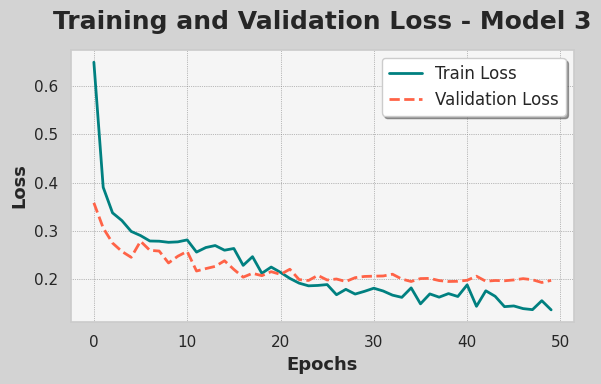

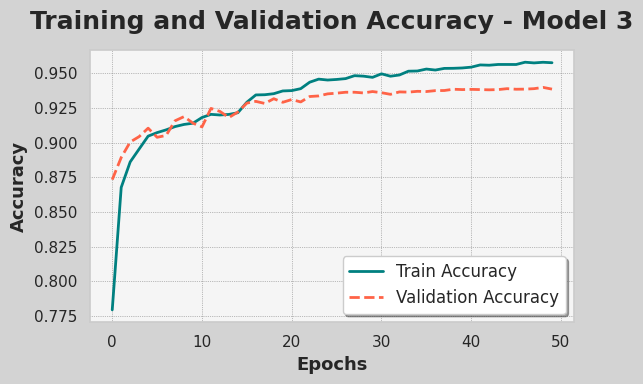

In [51]:
# we plot loss and Accuracy of Model-3
plot_metrics(training_history3, 'loss', 'Loss', 'Training and Validation Loss - Model 3')
plot_metrics(training_history3, 'accuracy', 'Accuracy', 'Training and Validation Accuracy - Model 3')

We make a summary of the model to get in details of which layer has what parameters for the model.

In [52]:
cnn_model_v3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,485,846 (9.48 MB)

 Trainable params: 1,241,962 (4.74 MB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 1,241,964 (4.74 MB)

We now check the various metrics such as accuracy, precision, recall and the F1 score. We also create a confusion matrix for the same for understanding how our prediction went visually.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
The evaluation results for the validation dataset are: 
Accuracy: 0.9386
Precision: 0.9390
Recall: 0.9386
F1 Score: 0.9387
Confusion Matrix:


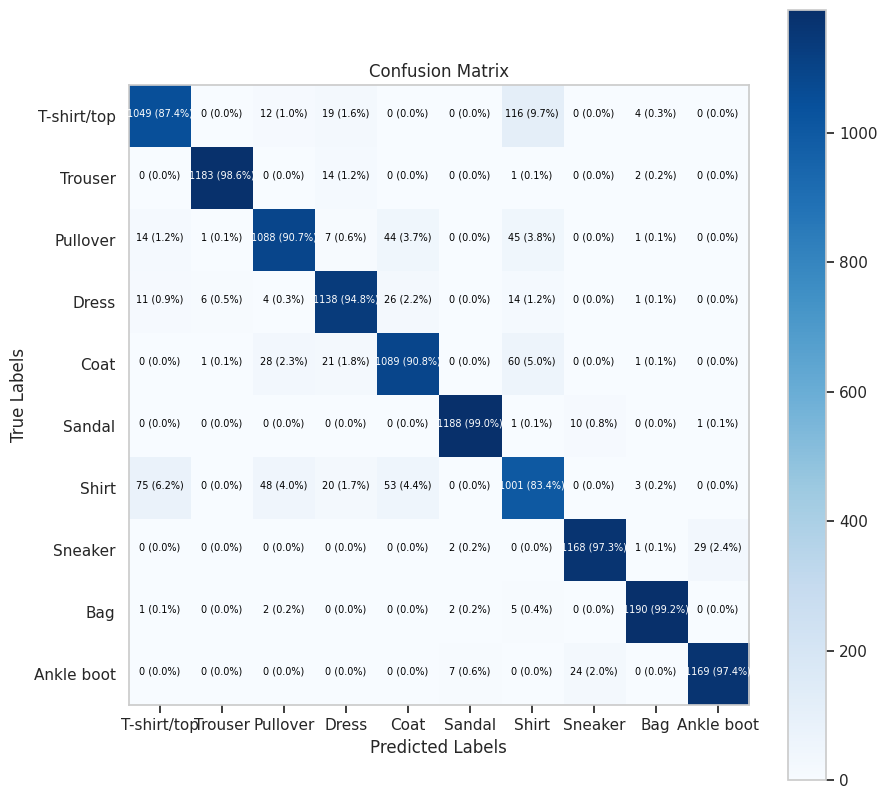

In [54]:
# Create a classification score report and confusion matrix for the same
y_probs3 = cnn_model_v3.predict(X_validation)
pred_labels3 = y_probs3.argmax(axis = 1)
accuracy = accuracy_score(y_validation, pred_labels3)
precision = precision_score(y_validation, pred_labels3, average = 'weighted')
recall = recall_score(y_validation, pred_labels3, average = 'weighted')
f1 = f1_score(y_validation, pred_labels3, average = 'weighted')
print('The evaluation results for the validation dataset are: ')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
plot_confusion_matrix(true_labels = y_validation, pred_labels = pred_labels3, class_names = classes, plot_size = (10, 10), label_size = 7)

We finally obtain a validation accuracy which is higher than 90% and we use this model as our best and final model for classification of fashion-mnist images. We now run this on the test dataset and calculate the prediction label metrics. We first train it on the entire training set, and then test it with the testing dataset.

In [57]:
# We create the model
learning_rate_optimizer = RMSprop(learning_rate = 0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0)

lr_reduction_callback = ReduceLROnPlateau(
    monitor='loss',
    patience = 3,
    verbose = 1,
    factor = 0.5,
    min_lr = 1e-7
)

dropout_rate = 0.4

cnn_model_v4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),

    # Block 1
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(dropout_rate),

    # Block 2
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(dropout_rate),

    # Block 3
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(dropout_rate),

    # Block 4
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(dropout_rate),

    # Final Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(10, activation='softmax')
])

# We compile the model
cnn_model_v4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=learning_rate_optimizer,
    metrics=['accuracy']
)

# We fit the model to the training data
training_history4 = cnn_model_v4.fit(X_train, y_train, epochs = 50, callbacks = [lr_reduction_callback])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6713 - loss: 0.9981 - learning_rate: 0.0010
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8648 - loss: 0.4099 - learning_rate: 0.0010
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8830 - loss: 0.3466 - learning_rate: 0.0010
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8951 - loss: 0.3254 - learning_rate: 0.0010
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9017 - loss: 0.3159 - learning_rate: 0.0010
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9066 - loss: 0.3024 - learning_rate: 0.0010
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9113 - loss: 0.2883 - learning_rate: 0.0010
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9115 - loss: 0.3044 - learning_rate: 0.0010
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9127 - loss: 0.2891 - learning

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
The evaluation results for the test dataset are: 
Accuracy: 0.9372
Precision: 0.9374
Recall: 0.9372
F1 Score: 0.9372
Confusion Matrix:


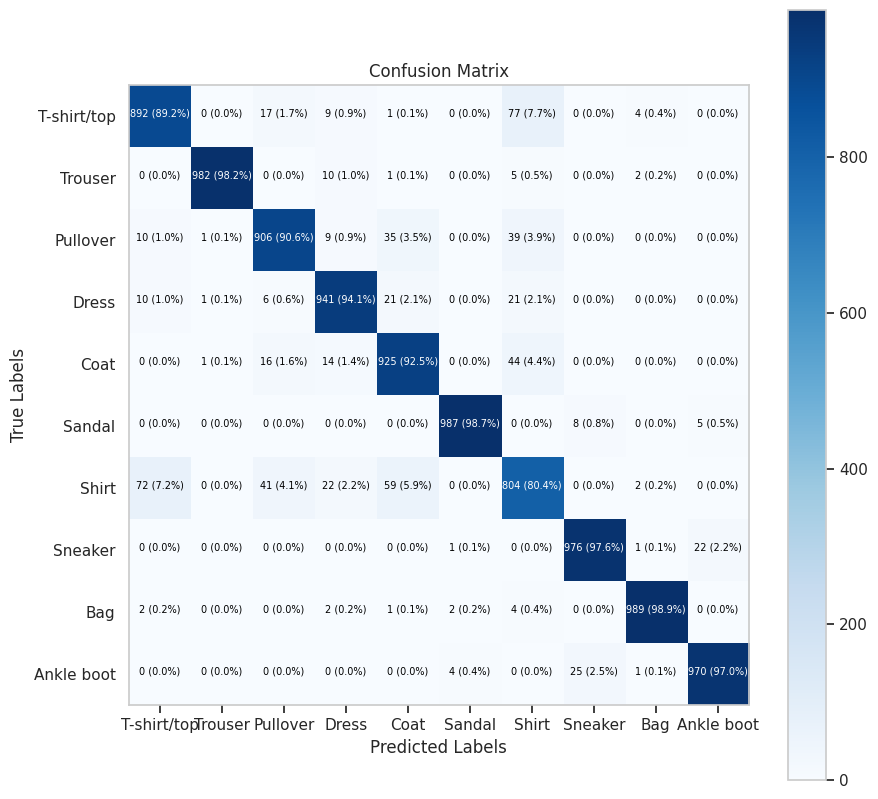

In [59]:
# Create a classification score report and confusion matrix for the test dataset
expand_test = np.expand_dims(test_images, -1)
y_probs4 = cnn_model_v4.predict(expand_test)
pred_labels4 = y_probs4.argmax(axis = 1)
accuracy = accuracy_score(test_labels, pred_labels4)
precision = precision_score(test_labels, pred_labels4, average = 'weighted')
recall = recall_score(test_labels, pred_labels4, average = 'weighted')
f1 = f1_score(test_labels, pred_labels4, average = 'weighted')
print('The evaluation results for the test dataset are: ')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
plot_confusion_matrix(true_labels = test_labels, pred_labels = pred_labels4, class_names = classes, plot_size = (10, 10), label_size = 7)

We have achieved a accuracy of 93.72% on the testing dataset, which has satisfied our accuracy level achievement, along with a F1 score of 93.72% as well. From the confusion matrix, we observe that the t-shirt and the shirt predictions mix a little bit, but apart from that the model is able to fairly predict the rest of the classes. Let us visualize a few individual test images

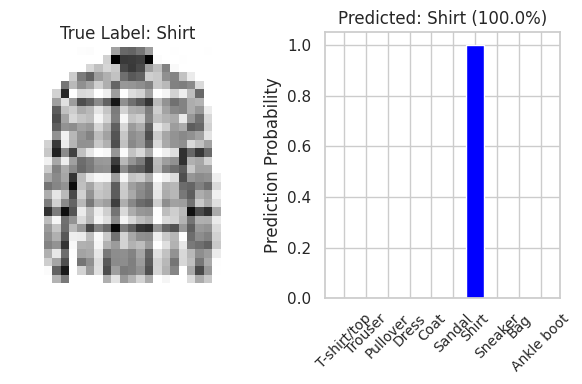

In [60]:
# We visualize prediction for a single image
index = 7
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.imshow(test_images[index], cmap=plt.cm.binary)
plt.title(f"True Label: {class_names[test_labels[index]]}", fontsize=12)
plt.axis('off')
plt.subplot(1, 2, 2)
probabilities = y_probs4[index]
plt.bar(range(10), probabilities, color=['blue' if i == test_labels[index] else 'gray' for i in range(10)])
plt.xticks(range(10), class_names, rotation=45, fontsize=10)
plt.ylabel("Prediction Probability")
plt.title(f"Predicted: {class_names[np.argmax(probabilities)]} ({np.max(probabilities) * 100:.1f}%)", fontsize=12)
plt.tight_layout()
plt.show()

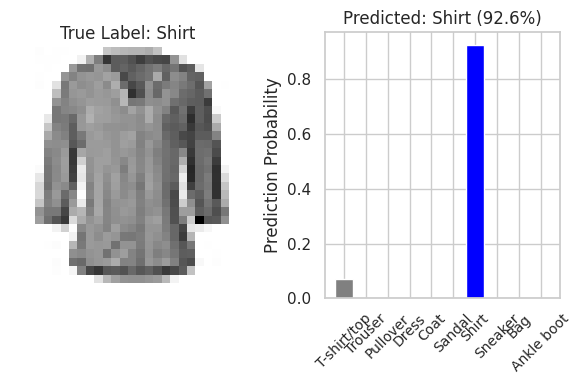

In [61]:
# We visualize prediction for a single image
index = 4
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.imshow(test_images[index], cmap=plt.cm.binary)
plt.title(f"True Label: {class_names[test_labels[index]]}", fontsize=12)
plt.axis('off')
plt.subplot(1, 2, 2)
probabilities = y_probs4[index]
plt.bar(range(10), probabilities, color=['blue' if i == test_labels[index] else 'gray' for i in range(10)])
plt.xticks(range(10), class_names, rotation=45, fontsize=10)
plt.ylabel("Prediction Probability")
plt.title(f"Predicted: {class_names[np.argmax(probabilities)]} ({np.max(probabilities) * 100:.1f}%)", fontsize=12)
plt.tight_layout()
plt.show()

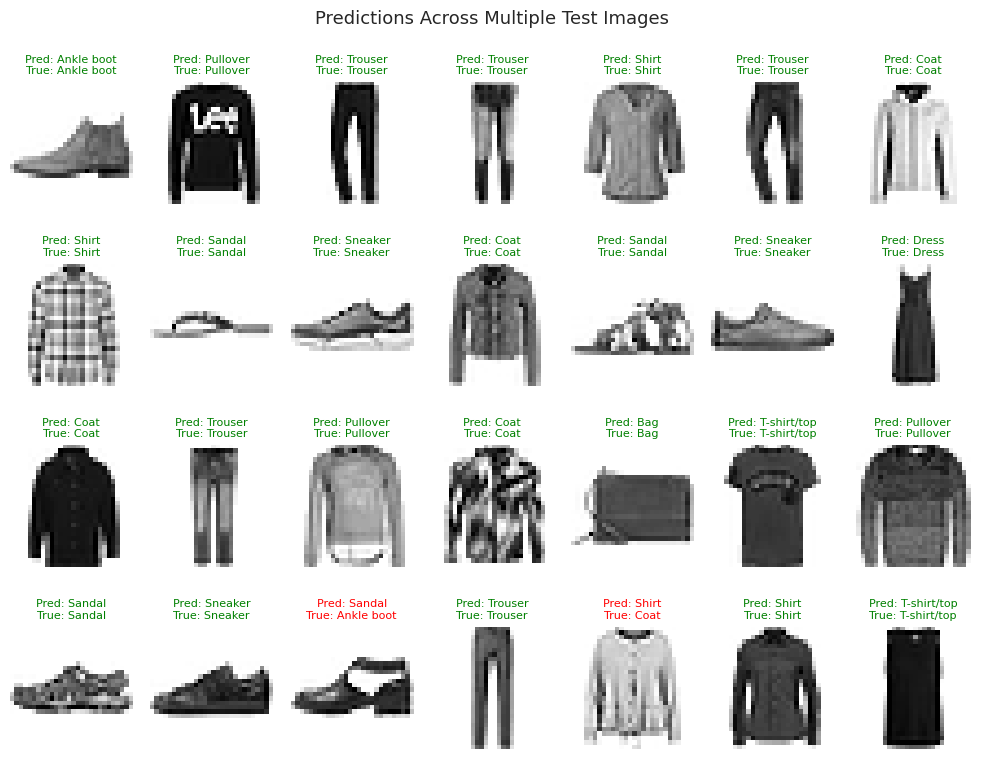

In [62]:
# We display multiple images with predictions
rows, cols = 4, 7
plt.figure(figsize=(10, 8))
for i in range(rows * cols):
    index = i
    plt.subplot(rows, cols, i + 1)
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    predicted_label = np.argmax(y_probs4[index])
    true_label = test_labels[index]
    color = 'green' if predicted_label == true_label else 'red'
    plt.title(
        f"Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}",
        color=color, fontsize=8
    )
    plt.axis('off')
plt.suptitle("Predictions Across Multiple Test Images", fontsize = 13)
plt.tight_layout()
plt.show()

We see how we obtain a probability of the item being that class as predicted by the model as the output.

**Business Insights:**

In recent times, Convolutional Neural Networks have turned out to be a backbone for modern machine learning in tasks that involve image and video data. These networks are particularly effective at finding patterns and features within grid-like data, making them ideal for a wide range of practical applications. In the medical domain, it finds its application in analyzing medical images to detect tumors or other abnormalities in X-rays, MRI scans, and CT scans. Autonomous driving deploys CNNs to power the vision for detecting pedestrians, other vehicles, traffic signs, and lane markings to enable safe navigation. The CNNs also find broad applications in retail and e-commerce for product image classification, which enables visual search capabilities that allow users to get similar products based on an image. The security and surveillance sector uses CNNs in areas like facial recognition and anomaly detection over video feeds. Social media companies use CNNs for auto-tagging and content moderation through the analysis of images and videos shared by users. Overall, CNNs are at the core of many AI-powered applications that surround us today, enabling companies to automate challenging tasks involving visual information with increased efficiency and offering innovative user experiences.


Now that we have finally finished our exploration, we save our best model and make use of it in a separate file just using the weights on the testing data so that we can easily run the code faster without training it multiple times.

In [63]:
# Save the best trained CNN model
#cnn_model_v1.save('cnn_model_v1.h5')
#cnn_model_v2.save('cnn_model_v2.h5')
#cnn_model_v3.save('cnn_model_v3.h5')
cnn_model_v4.save('cnn_model_v4.h5')